# <u> <center> What is `Machine Learning`? </center> </u>
# Machine learning is set of techniques to make computers better at doing things that humans (traditionally) can do better than machines.
<li> Machine learning involves making machines learn things like humans do. </li>


# <center> `Linear regression`


## <center>Simple Linear regression
### $Y = mx + b$
where <br>
$Y$ => Dependent variable/ target variable <br>
$m$ => Slope or the Gradient or coefficient<br>
$x$ => Independent variables <br>
$b$ => Y intercept

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [288]:

data = {'area':[2600, 3000, 3200, 3600, 4000], 'price':[550000, 565000, 610000, 680000, 725000]}
df = pd.DataFrame(data)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price (USD)')

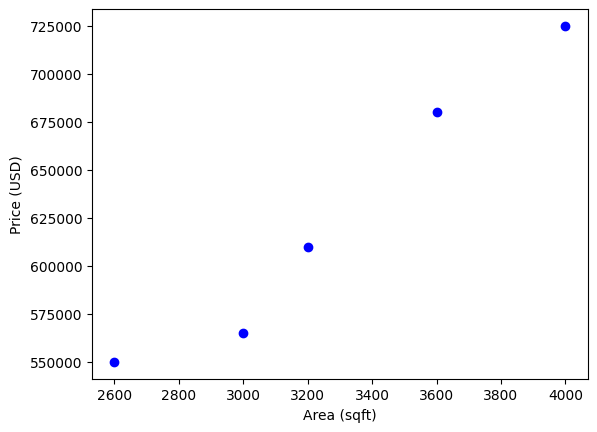

In [289]:
%matplotlib inline
plt.scatter(df.area, df.price, color='blue', marker='o')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (USD)')

In [290]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [291]:
# Prediction
reg.predict([[3300]])

/Users/prajeeshr/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [292]:
coefficient_m = reg.coef_
print("co-efficient: ", coefficient_m)
intercept_b = reg.intercept_
print("intercept: ",intercept_b)

co-efficient:  [135.78767123]
intercept:  180616.43835616432


In [293]:
# manual prediction
coefficient_m * 3300 + intercept_b 

array([628715.75342466])

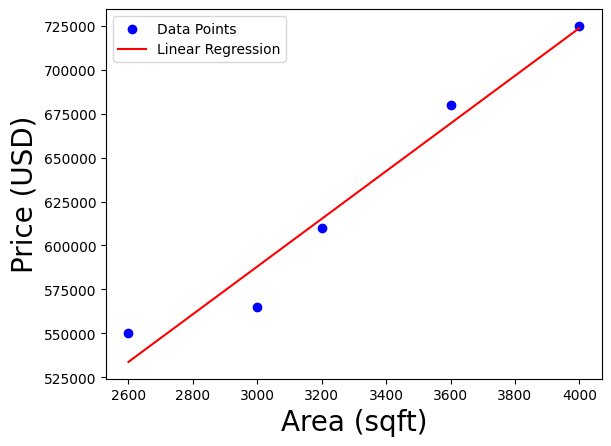

In [294]:
%matplotlib inline
plt.xlabel('Area (sqft)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.scatter(df.area, df.price, color='blue', marker='o')
plt.plot(df.area, reg.predict(df[['area']]), color='red')
plt.legend(['Data Points', 'Linear Regression'], loc='best')
plt.show()


## <center> Multiple/ Multivariate Linear Regression
### $Y = m_1x_1 + m_2x_2 + m_3x_3 + ... + b$

where <br>
$Y$ => Dependent variable/ target variable <br>
$m_1, m_2, m_3$=> Slope or the Gradient or coefficient<br>
$x_1, x_2, x_3$ => Independent variables <br>
$b$ => Y intercept



In [295]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math


In [296]:
data = {
    'area':[2600, 3000, 3200, 3600, 4000], 
    'bedrooms': [3.0,4.0,np.nan, 3.0, 5.0], 
    'age': [20, 15, 18, 30, 8], 
    'price': [550000, 565000, 610000, 595000, 760000]
    }

In [297]:
df = pd.DataFrame(data)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [298]:
median_bedroom = math.floor(df.bedrooms.median())
median_bedroom

3

In [299]:
df.bedrooms.fillna(median_bedroom, inplace=True)
df

/var/folders/_7/d30rj2c51yd6xjpx4nryyb9w0000gn/T/ipykernel_7829/4289390596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bedrooms.fillna(median_bedroom, inplace=True)


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [300]:
reg = LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)


LinearRegression()

In [301]:
coefficient_m = reg.coef_
print(coefficient_m)
intercept_b = reg.intercept_
print(intercept_b)

[   137.25 -26025.    -6825.  ]
383725.0


In [302]:
reg.predict([[3000, 3,40]])

/Users/prajeeshr/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [303]:
(137.25 * 3000) + (-26025 * 3) + (-6825 * 40) + 383725 

444400.0

# <center> `Logistic Regression`

## <center> Binary Classification

### Sigmoid: $\hat{y} =\sigma(z) = \frac{1}{1 + e^{-z}}$
##### where $z = mx + c$, and e = 2.71828


In [304]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [305]:
data = {
    "age": [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 49, 55, 25, 58, 19, 18, 21, 26, 40, 45, 50, 54, 23], 
    "bought_insurance": [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
    }

In [306]:
df = pd.DataFrame(data)
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


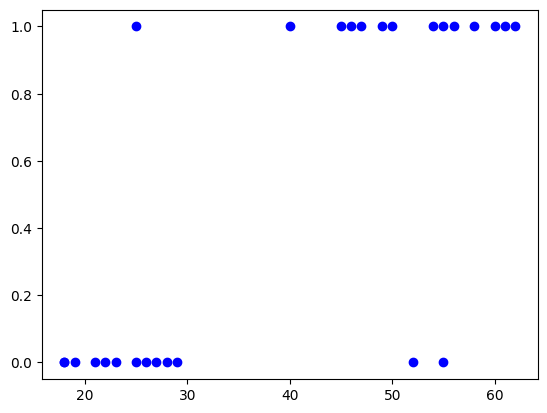

In [307]:
plt.scatter(df.age, df.bought_insurance,marker = 'o', color = 'blue')

In [308]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['age']], df[['bought_insurance']], train_size=0.9,random_state=7)

In [309]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

/Users/prajeeshr/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [310]:
prediction = model.predict(xtest)

In [311]:
model.score(xtest,ytest)

1.0

In [312]:
model.predict_proba(xtest)

array([[0.27388828, 0.72611172],
       [0.06078249, 0.93921751],
       [0.85754783, 0.14245217]])

In [313]:
m = model.coef_
b = model.intercept_

In [314]:
e = 2.71828
z = m * xtest.age.values[0] + b
y = 1/(1 + e ** (-z) )
y


array([[0.72611159]])

In [315]:
xtest

,age
2,47
9,61
1,25


## <center> Multiclass Classification


In [361]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [317]:
digits = load_digits()

In [318]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

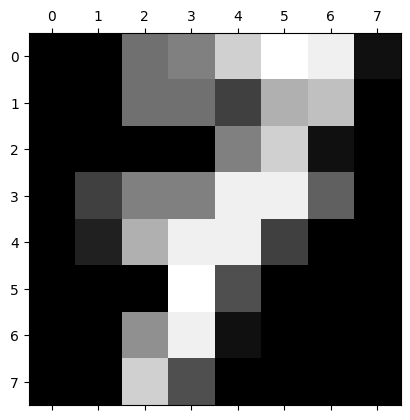

In [319]:
plt.gray()
plt.matshow(digits.images[7])

In [320]:
digits.target[7]


7

In [321]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=7)

In [322]:
model = LogisticRegression(max_iter=1000)
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [352]:
m = model.coef_
b = model.intercept_

In [323]:
model.score(xtest,ytest)

0.9472222222222222

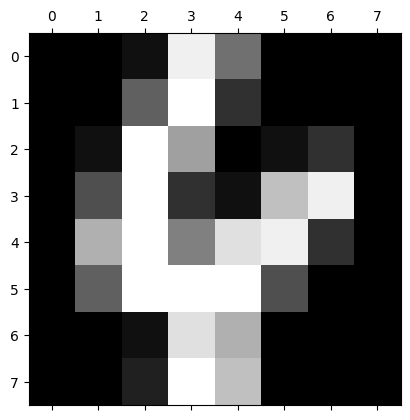

actual digit is 4
Predicted digit is [4]


In [354]:
### Prediction

index = np.random.randint(1789)
plt.matshow(digits.images[index])
plt.show()
print("actual digit is", digits.target[index])
print("Predicted digit is", model.predict([digits.data[index]]))


In [355]:
# Manual prediction

predict = []
for i in range(model.coef_.shape[0]):
    z = sum(m[i] * digits.data[index]) + b[i]
    y_hat = 1/(1 + e ** (-z) )
    predict.append(y_hat)
print("Predicted value is: ", np.argmax(predict))

Predicted value is:  4


In [364]:
y_predicted = model.predict(xtest)
cm = confusion_matrix(ytest, y_predicted)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  1,  0,  1,  4,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 29]])

Text(95.72222222222221, 0.5, 'Actual')

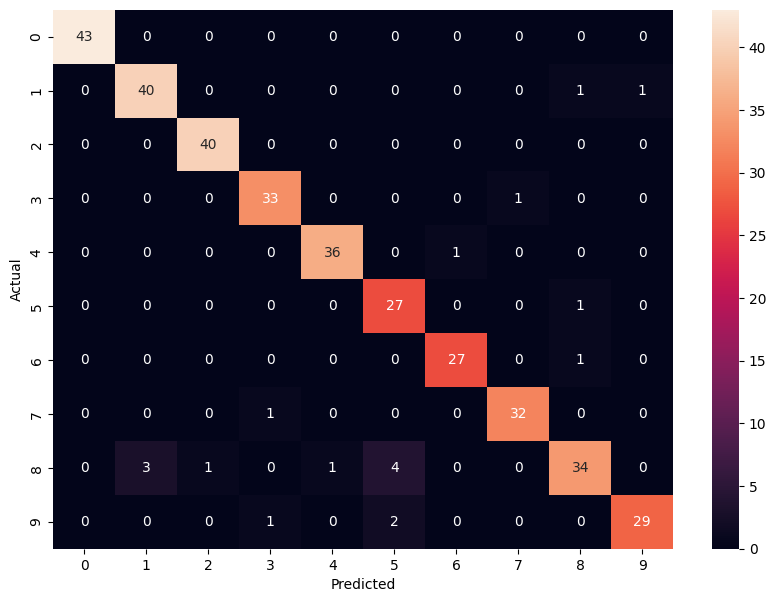

In [362]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# <center> `Decision Tree`

In [395]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [377]:
df = pd.read_csv(r'./Datasets/salaries.csv')
df.head(7)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0


In [378]:
inputs = df.drop( columns = ['salary_more_then_100k'], axis = 1)
target = df.salary_more_then_100k

In [379]:
encoded_company = LabelEncoder()
encoded_job = LabelEncoder()
encoded_degree = LabelEncoder()

In [386]:
inputs['encoded_company'] = encoded_company.fit_transform(df.company)
inputs['encoded_jobs'] = encoded_job.fit_transform(df.job)
inputs['encoded_degree'] = encoded_degree.fit_transform(df.degree)

In [391]:
inputs.drop(columns = ['company', 'job', 'degree'], axis = 'columns', inplace = True)

In [392]:
inputs

,encoded_company,encoded_jobs,encoded_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [396]:
model = DecisionTreeClassifier()
model.fit(inputs,target)

DecisionTreeClassifier()

In [397]:
model.score(inputs,target)

1.0

In [399]:
model.predict([[0,0,2]])

/Users/prajeeshr/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# <center> `Support Vector machine (SVM)`

### References
<li> https://youtube.com/playlist?list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&si=bKUEDxGgPe6AUuTc </li>

https://youtube.com/playlist?list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&si=sHi0lSR2ELuYhFmT